# Overview

Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.
Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.
In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Source : https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

# 1. Import libraries

In [254]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model construction
import tensorflow as tf

# 2. Import and read the data

In [232]:
## Lets import the data and glimpse the first five rows
fetal_data = pd.read_csv('fetal_health.csv.xls')
fetal_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [233]:
## This dataset consists of 22 columns and 2126 rows
fetal_data.shape

(2126, 22)

# 3. Data description

This dataset contains 2126 records of features extracted from Cardiotocogram exams,
which were then classified by three expert obstetritians into 3 classes:
    
Normal

Suspect

Pathological

# 4. Exploratory Data Analysis (EDA)

## 4.1 Data types, missing data and summary statistics


In [234]:
## Non-null count and data types of dataset
fetal_data.info()
## It seems there is no missing values and all data types are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [235]:
## Checking for missing values in dataset
fetal_data.isnull().sum().sort_values(ascending=False)
## Indeed there is no missing values

baseline value                                            0
accelerations                                             0
histogram_tendency                                        0
histogram_variance                                        0
histogram_median                                          0
histogram_mean                                            0
histogram_mode                                            0
histogram_number_of_zeroes                                0
histogram_number_of_peaks                                 0
histogram_max                                             0
histogram_min                                             0
histogram_width                                           0
mean_value_of_long_term_variability                       0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_short_term_variability                      0
abnormal_short_term_variability                           0
prolongued_decelerations                

<Axes: >

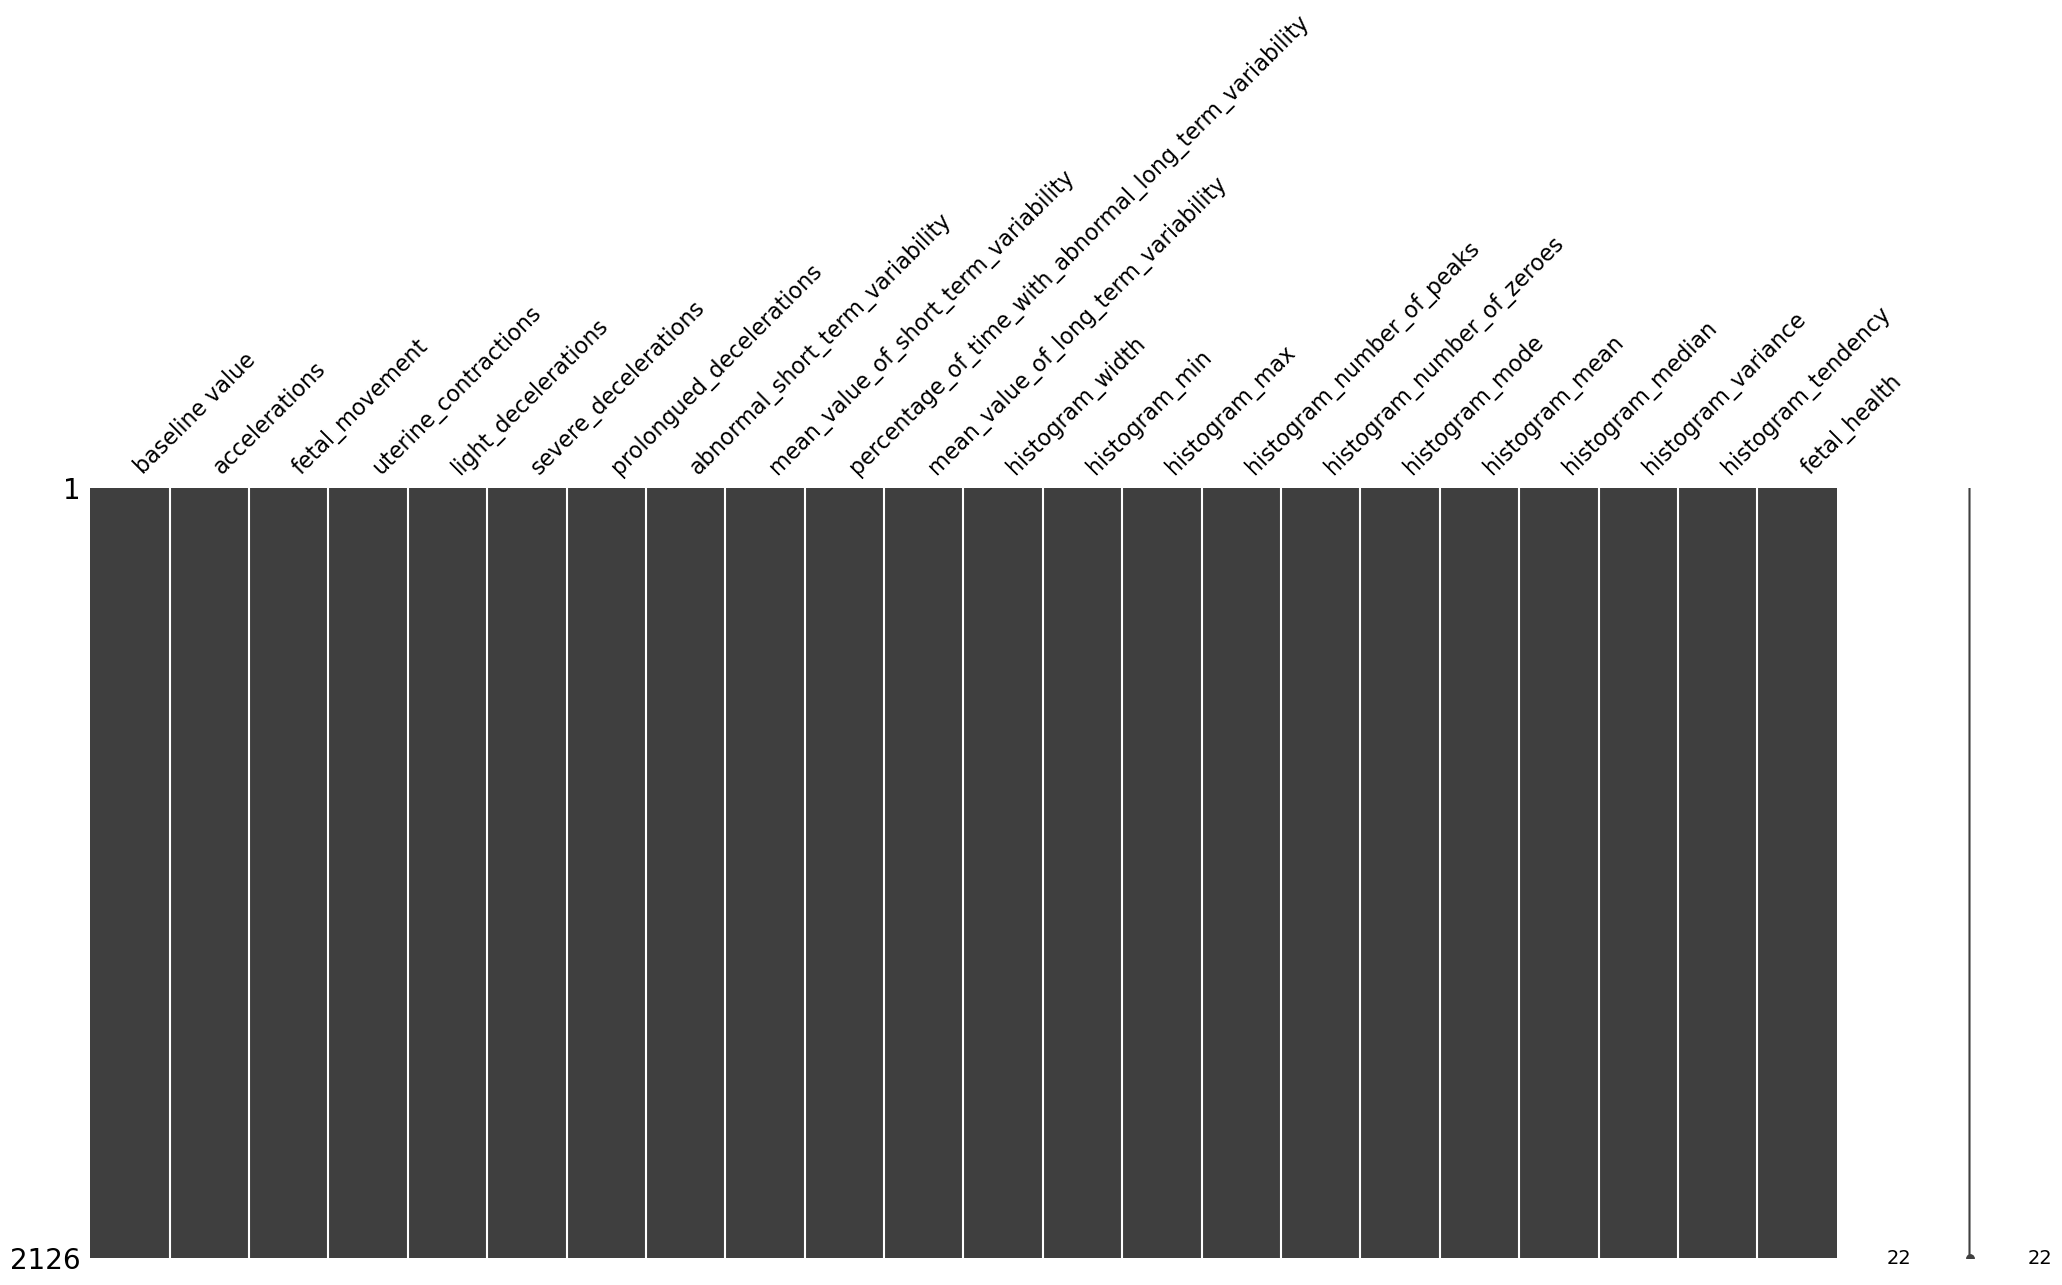

In [236]:
## Lets visualize the result
missingno.matrix(fetal_data)

In [237]:
## Descriptives statistics 
fetal_data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# 5.Data preprocessing

In [238]:
## Define the features and the targets
x = fetal_data.iloc[:,:-1]
y = fetal_data.iloc[:,-1]

## 5.1 Balance the data set

In [239]:
## As we can see the dataset is higly imbalanced
## In order to balance this dataset we should balance it downward to match the class with lower records
## This wouls be catastrophical for our predictive power as well as we should delete the majority of our records
num_one_targets = 0
num_two_targets =0
num_three_targets=0

for i in range(y.shape[0]):
    if y[i]==1:
        num_one_targets+=1
    elif y[i]==2:
        num_two_targets +=1
    else:
        num_three_targets +=1

print('The number of fetals with normal health conditions is',num_one_targets)
print('The number of fetals with suspect health conditions is', num_two_targets)
print('The number of fetals with pathological health conditions is', num_three_targets)

The number of fetals with normal health conditions is 1655
The number of fetals with suspect health conditions is 295
The number of fetals with pathological health conditions is 176


## 5.2 Feature scaling

In [240]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(unscaled_inputs_equals_priors)

## 5.3 Random shuffling

In [241]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equals_priors[shuffled_indices]

##  5.4 Splitting the dataset into the Training set, validation set and Test set

In [242]:
sample_count = shuffled_inputs.shape[0]

train_sample_count = int(0.8 * sample_count)
validation_sample_count = int(0.1 * sample_count)
test_sample_count = int(0.1 * sample_count)

train_inputs = shuffled_inputs[:train_sample_count]
train_targets = shuffled_targets[:train_sample_count]

validation_inputs = shuffled_inputs[train_sample_count:train_sample_count+validation_sample_count]
validation_targets = shuffled_targets[train_sample_count:train_sample_count+validation_sample_count]

test_inputs = shuffled_inputs[train_sample_count+validation_sample_count:]
test_targets = shuffled_targets[train_sample_count+validation_sample_count:]


## 5.4 Encoding dichotomus variables

In [246]:
test_targets = pd.get_dummies(test_targets)
train_targets = pd.get_dummies(train_targets)
validation_targets = pd.get_dummies(validation_targets)

# 6. Build the ANN

## 6.1 Initializing the ANN

In [189]:
fetal_ann = tf.keras.Sequential()

## 6.2 Adding the input layer and the hidden layers

In [190]:
fetal_ann.add(tf.keras.layers.Dense(units=21, activation='relu'))
fetal_ann.add(tf.keras.layers.Dense(units=21, activation='relu'))

## 6.3 Adding the output layer

In [191]:
fetal_ann.add(tf.keras.layers.Dense(units=3,activation='softmax'))

# 7. Training the ANN

## 7.1 Compiling the ANN

In [192]:
fetal_ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 7.2 Training the ANN on the Training set

In [193]:
fetal_ann.fit(train_inputs, train_targets, batch_size = 32, epochs = 200,
             validation_data= (validation_inputs, validation_targets),verbose = 2,
             callbacks = tf.keras.callbacks.EarlyStopping(patience=3))

Epoch 1/200
54/54 - 0s - loss: 0.8411 - accuracy: 0.6512 - val_loss: 0.6810 - val_accuracy: 0.7830 - 292ms/epoch - 5ms/step
Epoch 2/200
54/54 - 0s - loss: 0.5426 - accuracy: 0.7906 - val_loss: 0.5041 - val_accuracy: 0.8160 - 26ms/epoch - 483us/step
Epoch 3/200
54/54 - 0s - loss: 0.4089 - accuracy: 0.8388 - val_loss: 0.4284 - val_accuracy: 0.8396 - 26ms/epoch - 490us/step
Epoch 4/200
54/54 - 0s - loss: 0.3385 - accuracy: 0.8688 - val_loss: 0.3914 - val_accuracy: 0.8679 - 28ms/epoch - 518us/step
Epoch 5/200
54/54 - 0s - loss: 0.2981 - accuracy: 0.8841 - val_loss: 0.3711 - val_accuracy: 0.8726 - 26ms/epoch - 489us/step
Epoch 6/200
54/54 - 0s - loss: 0.2755 - accuracy: 0.8924 - val_loss: 0.3615 - val_accuracy: 0.8679 - 28ms/epoch - 517us/step
Epoch 7/200
54/54 - 0s - loss: 0.2578 - accuracy: 0.8953 - val_loss: 0.3551 - val_accuracy: 0.8585 - 27ms/epoch - 498us/step
Epoch 8/200
54/54 - 0s - loss: 0.2460 - accuracy: 0.8994 - val_loss: 0.3515 - val_accuracy: 0.8585 - 27ms/epoch - 507us/step
E

# 8. Predicting test results and making confution matrix

In [217]:
test_loss, test_accuracy = fetal_ann.evaluate(test_inputs,test_targets)

7/7 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9206


In [249]:
print('The test loss is:', round(test_loss,2))
print('The test accuracy is:',round(test_accuracy,2))

The test loss is: 0.23
The test accuracy is: 0.92


In [218]:
y_pred = fetal_ann.predict(test_inputs)

7/7 [==============================] - 0s 1ms/step


In [219]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [220]:
y_pred_classes

array([2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1])

In [226]:
if len(test_targets.shape) > 1 and test_targets.shape[1] > 1:  
    y_test_classes = np.argmax(test_targets, axis=1)
else:
    y_test_classes = test_targets

In [228]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy Score:", accuracy)


Confusion Matrix:
 [[157   8   0]
 [  2  22   1]
 [  0   6  18]]
Accuracy Score: 0.9205607476635514


In [229]:
from sklearn.metrics import classification_report

print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97       165
           1       0.61      0.88      0.72        25
           2       0.95      0.75      0.84        24

    accuracy                           0.92       214
   macro avg       0.85      0.86      0.84       214
weighted avg       0.94      0.92      0.93       214



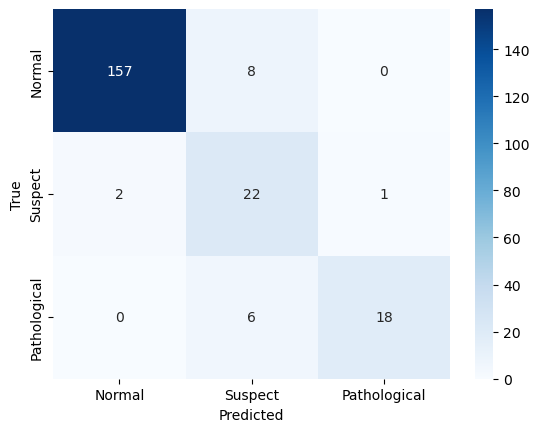

In [230]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspect', 'Pathological'], yticklabels=['Normal', 'Suspect', 'Pathological'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Conclusion

As we can see the AI model predicted the three classes of fetals health condition correctly with a percentage of 92% accuracy.
More precicely model predicts corectly that 157 fetals had normal health conditions, and predicted 8 fetals wrogly to have suspected condition but where absolutely normal.
Regarding suspected fetals, model predicts correclty that 22 of them had suspected health condition and 2 of them predicted to have normal where they have suspected.
As per pathological conditions model predict correctly that 18 of fetals had pathologican conditions and 6 of them predicted wrongly to have suspected condition where they have pathological.